In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
yf.pdr_override()
import datetime as dt
import json
import tensorflow as tf
from tensorflow import keras

In [2]:
start = '2010-01-01'
end = '2022-12-31'

df = pdr.get_data_yahoo('AAPL', start, end )
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.515213,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.526477,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.422665,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.410790,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.453413,447610800


In [3]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-23,130.919998,132.419998,129.639999,131.860001,131.860001,63814900
2022-12-27,131.380005,131.410004,128.720001,130.029999,130.029999,69007800
2022-12-28,129.669998,131.029999,125.870003,126.040001,126.040001,85438400
2022-12-29,127.989998,130.479996,127.730003,129.610001,129.610001,75703700
2022-12-30,128.410004,129.949997,127.430000,129.929993,129.929993,76960600


In [5]:
df = df.reset_index()
df.head()

,index,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.515213,493729600
1,1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.526477,601904800
2,2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.422665,552160000
3,3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.410790,477131200
4,4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.453413,447610800


In [6]:
df = df.drop(['Date','Adj Close'], axis = 1)
df.head()

,index,Open,High,Low,Close,Volume
0,0,7.622500,7.660714,7.585000,7.643214,493729600
1,1,7.664286,7.699643,7.616071,7.656429,601904800
2,2,7.656429,7.686786,7.526786,7.534643,552160000
3,3,7.562500,7.571429,7.466071,7.520714,477131200
4,4,7.510714,7.571429,7.466429,7.570714,447610800


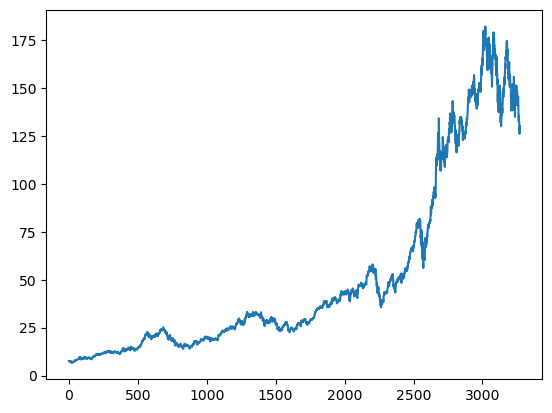

In [7]:
plt.plot(df.Close)

In [7]:
df

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800
...,...,...,...,...,...
3267,130.919998,132.419998,129.639999,131.860001,63814900
3268,131.380005,131.410004,128.720001,130.029999,69007800
3269,129.669998,131.029999,125.870003,126.040001,85438400
3270,127.989998,130.479996,127.730003,129.610001,75703700


In [8]:
ma100 = df.Close.rolling(100).mean() #ma = moving average
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3267    150.515600
3268    150.157800
3269    149.764699
3270    149.412100
3271    149.062199
Name: Close, Length: 3272, dtype: float64

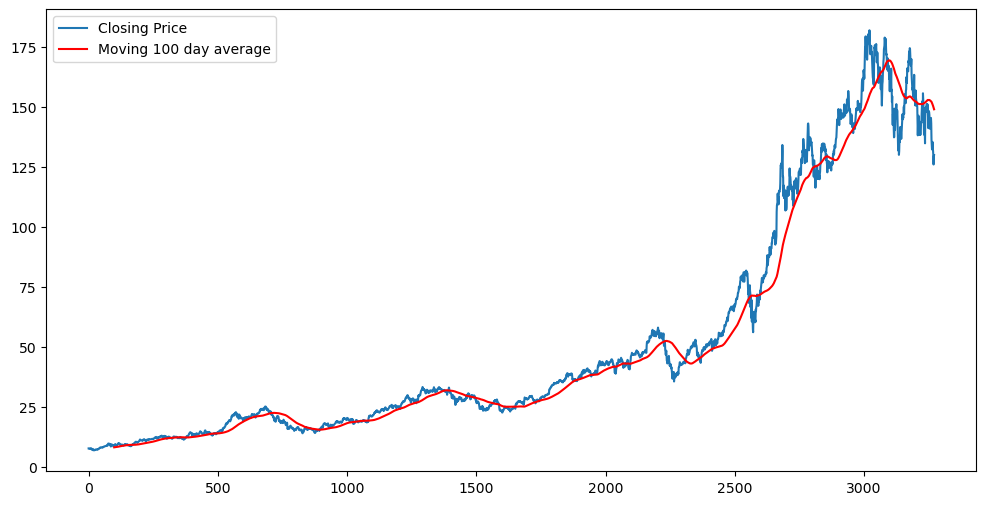

In [9]:
plt.figure(figsize = (12,6))
plt.plot(df.Close, label = 'Closing Price')
plt.plot(ma100,'r', label='Moving 100 day average')
plt.legend()
plt.show()

In [10]:
ma200 = df.Close.rolling(200).mean() #ma = moving average
ma200

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3267    152.1331
3268    152.0096
3269    151.8867
3270    151.7593
3271    151.6110
Name: Close, Length: 3272, dtype: float64

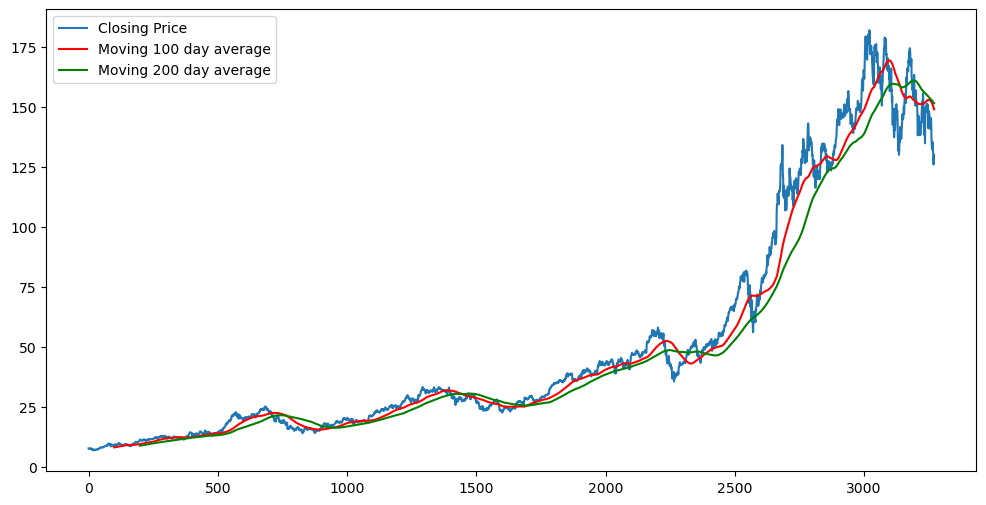

In [11]:
plt.figure(figsize = (12,6))
plt.plot(df.Close,label='Closing Price')
plt.plot(ma100,'r',label = 'Moving 100 day average')
plt.plot(ma200,'g',label = 'Moving 200 day average')
plt.legend()
plt.show()


In [12]:
df.shape

(3272, 5)

In [13]:
#Spliting data into training and testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing =  pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)
                             

(2290, 1)
(982, 1)


In [14]:
data_training.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [15]:
from sklearn.preprocessing import MinMaxScaler  #data scaling = reduces the difference between the points in the data  
                                                 # which results in greater accuracy. It comes under Data Preproccesing
scaler = MinMaxScaler(feature_range=(0,1))


In [16]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.01533047],
       [0.01558878],
       [0.01320823],
       ...,
       [0.71710501],
       [0.71739828],
       [0.70127194]])

In [17]:
data_training_array.shape

(2290, 1)

In [18]:
x_train = []  # this is the steps we take, for example 100 days data 
y_train = []  #this is the predicted value, ie value on 101 day after analysing 100 days.

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
    
x_train , y_train = np.array(x_train) , np.array(y_train)


In [19]:
x_train.shape

(2190, 100, 1)

In [20]:
y_train.shape

(2190,)

In [21]:
#ML Model

In [22]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential, model_from_json

In [23]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences= True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences= True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences= True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))  #connects the whole model

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [25]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train , y_train, epochs = 50)

Epoch 1/50
69/69 [==============================] - 20s 206ms/step - loss: 0.0347
Epoch 2/50
69/69 [==============================] - 14s 199ms/step - loss: 0.0070
Epoch 3/50
69/69 [==============================] - 14s 201ms/step - loss: 0.0065
Epoch 4/50
69/69 [==============================] - 14s 199ms/step - loss: 0.0063
Epoch 5/50
69/69 [==============================] - 14s 204ms/step - loss: 0.0054
Epoch 6/50
69/69 [==============================] - 15s 217ms/step - loss: 0.0047
Epoch 7/50
69/69 [==============================] - 15s 215ms/step - loss: 0.0049
Epoch 8/50
69/69 [==============================] - 14s 207ms/step - loss: 0.0049
Epoch 9/50
69/69 [==============================] - 16s 234ms/step - loss: 0.0048
Epoch 10/50
69/69 [==============================] - 15s 218ms/step - loss: 0.0040
Epoch 11/50
69/69 [==============================] - 14s 206ms/step - loss: 0.0038
Epoch 12/50
69/69 [==============================] - 14s 209ms/step - loss: 0.0038
Epoch 13/50
6

In [26]:

model.save('keras_model4.keras')

In [27]:
data_testing.head()

,Close
2290,42.602501
2291,42.357498
2292,42.722500
2293,42.544998
2294,42.700001


In [28]:
past_100_days = data_training.tail(100)

In [29]:
final_df = pd.concat([past_100_days, data_testing],ignore_index = True, axis = 0)


In [30]:
final_df.head()

,Close
0,55.959999
1,54.470001
2,54.560001
3,54.592499
4,55.007500


In [31]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.13937014],
       [0.1291969 ],
       [0.1298114 ],
       ...,
       [0.61785443],
       [0.64222927],
       [0.64441407]])

In [32]:
input_data.shape

(1082, 1)

In [33]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i,0])

In [34]:
x_test , y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(982, 100, 1)
(982,)


In [35]:
#Making Predictions

y_predicted = model.predict(x_test)

31/31 [==============================] - 2s 62ms/step


In [36]:
y_predicted.shape

(982, 1)

In [37]:
y_test

array([0.04816933, 0.04649653, 0.04898865, 0.04777672, 0.04883503,
       0.04818639, 0.04905691, 0.05093454, 0.04927882, 0.05253905,
       0.05468976, 0.05486046, 0.05578219, 0.05284628, 0.05595289,
       0.05745499, 0.05690876, 0.05518478, 0.05173679, 0.05243663,
       0.06266108, 0.06609201, 0.06745755, 0.07090551, 0.07498506,
       0.07822822, 0.0756849 , 0.07846719, 0.09029614, 0.08340019,
       0.07945721, 0.07612869, 0.07899633, 0.07942306, 0.08152257,
       0.08372451, 0.08846975, 0.09073996, 0.09132031, 0.09355637,
       0.09884784, 0.09782367, 0.09973542, 0.09688486, 0.09674831,
       0.0973628 , 0.09739694, 0.10401981, 0.10526585, 0.10640949,
       0.1114449 , 0.1108987 , 0.10768968, 0.1060169 , 0.10654605,
       0.09982077, 0.11663396, 0.11429546, 0.11873346, 0.11315182,
       0.10355893, 0.1036272 , 0.09990612, 0.0938636 , 0.0743023 ,
       0.07932065, 0.08317828, 0.08174448, 0.079901  , 0.06981308,
       0.0758044 , 0.06928394, 0.06395836, 0.06278058, 0.06151

In [38]:
y_predicted

array([[0.09207357],
       [0.09277508],
       [0.09351471],
       [0.09425803],
       [0.09497693],
       [0.09565249],
       [0.09627241],
       [0.09683166],
       [0.09733434],
       [0.09778409],
       [0.09819143],
       [0.09857252],
       [0.09894121],
       [0.09930849],
       [0.09967425],
       [0.10003999],
       [0.1004099 ],
       [0.1007849 ],
       [0.10115957],
       [0.10152046],
       [0.10185573],
       [0.10217963],
       [0.10251808],
       [0.10289432],
       [0.10332945],
       [0.10384317],
       [0.10445142],
       [0.10515213],
       [0.10593656],
       [0.10681757],
       [0.10778832],
       [0.1088219 ],
       [0.10988012],
       [0.11093259],
       [0.11195733],
       [0.11294317],
       [0.11388993],
       [0.11481018],
       [0.11572209],
       [0.11663985],
       [0.11757603],
       [0.1185481 ],
       [0.11956429],
       [0.12062775],
       [0.12172765],
       [0.12284681],
       [0.12396851],
       [0.125

In [42]:
scaler.scale_  #gives the factor with which the above data is scaled down so that we can scale it up again

array([0.00682769])

In [44]:
scale_factor = 1/0.00682769
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

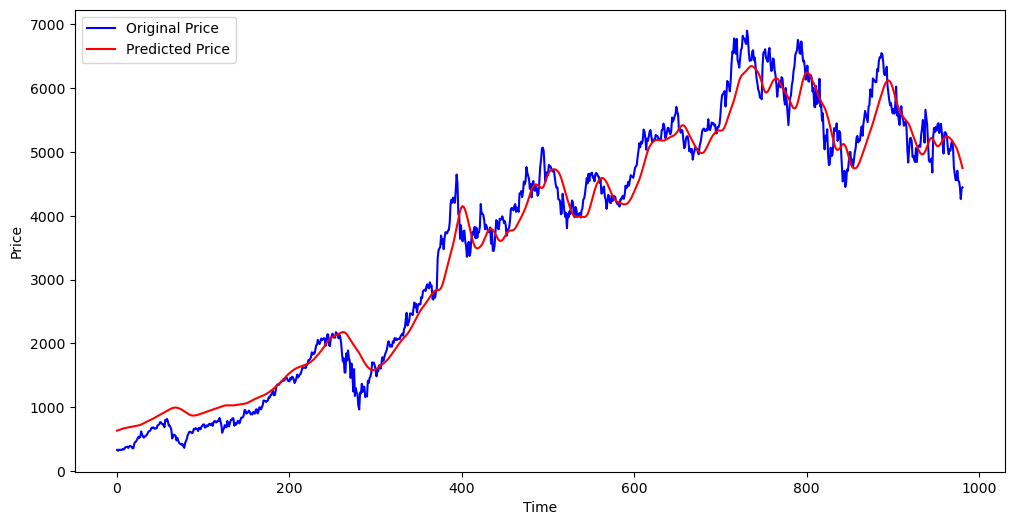

In [45]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_predicted, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()